In [1]:
import pandas as pd
import numpy as np

# Treat outliers
from scipy.stats import zscore


# Standardize values------------------------
from sklearn.preprocessing import StandardScaler

# ML models---------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

# Ploting-----------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Dimension reduction-----------------------
from sklearn.decomposition import PCA

# Metrics for clusterization----------------
from sklearn.metrics import silhouette_score

# 3D visualization--------------------------
import plotly.graph_objects as go

import numpy as np
from scipy.stats import zscore


# Standardize values------------------------
from sklearn.preprocessing import StandardScaler

# ML models---------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

# Ploting-----------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Dimension reduction-----------------------
from sklearn.decomposition import PCA

# Metrics for clusterization----------------
from sklearn.metrics import silhouette_score

# 3D visualization--------------------------
import plotly.graph_objects as go

# DATAFRAME PARA UTILIZAR

In [2]:
df_fuente_ml_humanos = pd.read_csv('./CSV/df_fuente_ml_humanos.csv')
df_fuente_ml_humanos

# Habria que hacer el dummy del type.
# probar las fechas en timedelta.

,Unnamed: 0,Unnamed: 0_x,index,id,punk_id,type,from,to,amount_ether,amount_$,...,Unnamed: 0_y,traits_counts,trans_type,year,month,day,skin_Albino,skin_Dark,skin_Light,skin_Mid
0,0,17,100010,0x953cae,6401,Sold,0x577eBC,0x561786,19.990000,39866.70,...,17,3,Sold,2021,7,14,0,0,0,1
1,1,25,100018,0x9c2984,6401,Sold,0x7B5485,0x577ebc,16.980000,70784.50,...,25,3,Sold,2021,5,11,0,0,0,1
2,2,41,100032,0x2e06fb,6401,Sold,0x023EF7,0x7b5485,20.750000,42996.30,...,41,3,Sold,2021,4,9,0,0,0,1
3,3,43,100034,0x4095a8,6401,Sold,0xaBF107,0x023ef7,18.500000,38334.00,...,43,3,Sold,2021,4,9,0,0,0,1
4,4,53,100043,0x69d646,6401,Sold,0xcA8fE4,0xabf107,17.990000,37573.40,...,53,3,Sold,2021,4,8,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15824,15959,166363,99965,0xf0a5a8,6397,Sold,0x6611fE,0xf0f068,0.550000,77.69,...,166363,3,Sold,2020,1,8,0,1,0,0
15825,15960,166367,99969,0x7fe8a5,6398,Sold,0x1919DB,0x602669,18.500000,34686.60,...,166367,3,Sold,2021,6,22,1,0,0,0
15826,15961,166371,99972,0xc8546a,6398,Sold,0xb78E3E,0x1919db,16.760000,39682.00,...,166371,3,Sold,2021,6,16,1,0,0,0
15827,15962,166378,99979,0xef0f1d,6398,Sold,0x53edE7,0xb78e3e,0.666666,135.30,...,166378,3,Sold,2020,5,14,1,0,0,0


In [3]:
# Remove first set of columns for first model
columnas_drop_1 = ['Unnamed: 0_x',
                   'Unnamed: 0',
                   'id',
                   'from',
                   'to',
                   'amount_ether',
                   'index', 
                   'type', 
                   'date', 
                   'traits', 
                   'Unnamed: 0_y', 
                   'trans_type',
                   'rarity'] #Quito el rarity porque es un valor que no se repite y no aporta nada al clustering

df_fuente_ml_humanos_1 = df_fuente_ml_humanos.drop(columns=columnas_drop_1, axis=1)

# Clustering

# 1A

In [4]:
# Set the dtypes properly
# df_fuente_ml_humanos_1.info(verbose=True)
df_fuente_ml_humanos_1[['punk_id', 'traits_counts']] = df_fuente_ml_humanos_1[['punk_id', 'traits_counts']].astype('object') 

In [5]:
df_fuente_ml_humanos_1.describe()

,amount_$,id.1,'Bandana','Beanie','BigBeard','BigShades','BlackLipstick','BlondeBob','BlondeShort','BlueEyeShadow',...,'WildBlonde','WildHair','WildWhiteHair',year,month,day,skin_Albino,skin_Dark,skin_Light,skin_Mid
count,1.582900e+04,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,...,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.00000,15829.000000,15829.000000,15829.000000
mean,5.163768e+04,5391.412850,0.055089,0.005749,0.013709,0.052372,0.060648,0.009034,0.009539,0.025207,...,0.007202,0.042896,0.009539,2020.204119,5.568513,15.902710,0.09312,0.310127,0.295597,0.301156
std,8.206740e+04,2677.641288,0.228161,0.075606,0.116284,0.222784,0.238691,0.094620,0.097206,0.156758,...,0.084561,0.202629,0.097206,1.254345,2.957762,8.895748,0.29061,0.462560,0.456325,0.458775
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,2.120400e+02,3147.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2020.000000,3.000000,8.000000,0.00000,0.000000,0.000000,0.000000
50%,3.041060e+04,5428.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2021.000000,5.000000,16.000000,0.00000,0.000000,0.000000,0.000000
75%,6.490980e+04,7700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2021.000000,8.000000,23.000000,0.00000,1.000000,1.000000,1.000000
max,1.776130e+06,9998.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2021.000000,12.000000,31.000000,1.00000,1.000000,1.000000,1.000000


## 1 - Sin tratamiento de outliers
    - Standardize values
    - Apply PCA (on other model)
    - Apply elbow method to find best k
    - Apply kmeans
    - Predic labels
    - Inertia y Silhouette scores
    - Identificar/caracterizar grupos
    - Plot points and centroids (when using PCA)

In [6]:
# Standardize values
scaler = StandardScaler()
# He dejado algunos atributos tipo object. Solo estandarizo los numericos
df_ml_humanos_1_std = scaler.fit_transform(df_fuente_ml_humanos_1.select_dtypes(exclude='object'))

In [7]:
# Create sum of squared error list to hold this values (inertia_) in order to see what´s the best value for k (Elbow Method)
sse = []
silhouette = []
for k in range(2, 11):
    classifier_kmeans = KMeans(n_clusters=k, random_state=42)
    classifier_kmeans.fit(df_ml_humanos_1_std)
    sil = silhouette_score(df_ml_humanos_1_std, classifier_kmeans.labels_)
    sse.append(classifier_kmeans.inertia_)
    silhouette.append(sil)

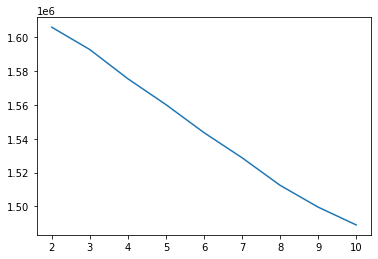

In [8]:
plt.plot(range(2, 11), sse)
plt.show()

### SALE ELBOW MENOS DEFINIDO

Primera question encontrada: el metodo elbow no hace un elbow muy claro, lo que nos dice que el modelo no puede diferencias muy bien los grupos.  
Voy seguir para ver que score tendremos.

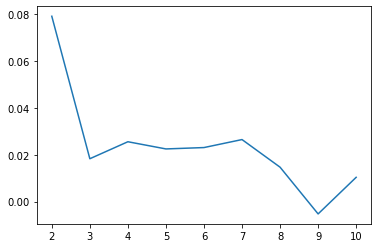

In [9]:
plt.plot(range(2, 11), silhouette)
plt.show()

**Inertia:**  

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

A good model is one with low inertia and a low number of clusters (K).

**Silhouette Score:**  

The value of Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighbouring clusters. A negative score [-1, 0] indicate that the samples might have got assigned to the wrong clusters.

In [10]:
# Since the model is mainly separating the 2 groups in males and females, we´ll use k=4 to get more meaninfull results
cluster = 7
classifier_kmeans = KMeans(n_clusters=cluster, random_state=42)
classifier_kmeans.fit(df_ml_humanos_1_std)
classifier_kmeans.predict(df_ml_humanos_1_std)
inertia = classifier_kmeans.inertia_
silhouette = silhouette_score(df_ml_humanos_1_std, classifier_kmeans.labels_)
print(f'K: {cluster}   Inertia: {inertia:.3f} Silhouette Score: {silhouette}')

K: 7   Inertia: 1528742.441 Silhouette Score: 0.026488513625927596


Resultados muy malos: Inertia alto y silhouette muy bajo, lo que significa que los puntos están distantes de los centroids y los grupos sin mucha definicion entre ellos.

In [11]:
# Print labels count
print(f'Label 0: {classifier_kmeans.labels_.tolist().count(0)}')
print(f'Label 1: {classifier_kmeans.labels_.tolist().count(1)}')
print(f'Label 2: {classifier_kmeans.labels_.tolist().count(2)}')
print(f'Label 3: {classifier_kmeans.labels_.tolist().count(3)}')

print(f'Sum of all labels: {len(classifier_kmeans.labels_.tolist())}')

Label 0: 341
Label 1: 321
Label 2: 9294
Label 3: 1094
Sum of all labels: 15829


In [12]:
# Add 'labels' column on original pre-processed df
df_fuente_ml_humanos_1['Labels'] = classifier_kmeans.labels_

In [13]:
#df_fuente_ml_humanos_1

In [14]:
# Group by Labels in order to withdraw first conclusions about it
df_fuente_ml_humanos_1.groupby('Labels').mean()

,amount_$,id.1,'Bandana','Beanie','BigBeard','BigShades','BlackLipstick','BlondeBob','BlondeShort','BlueEyeShadow',...,'WildBlonde','WildHair','WildWhiteHair',year,month,day,skin_Albino,skin_Dark,skin_Light,skin_Mid
Labels,,,,,,,,,,,,,,,,,,,,,
0,49803.469032,5593.337243,0.000000,0.000000,0.023460,0.055718,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,2020.211144,5.565982,16.152493,0.108504,0.354839,0.255132,0.281525
1,35740.839408,6054.258567,0.074766,0.000000,0.003115,0.115265,0.043614,0.031153,0.0,0.012461,...,0.006231,0.024922,0.012461,2020.015576,5.271028,16.074766,0.037383,0.376947,0.376947,0.208723
2,49596.077020,5325.921132,0.064235,0.008715,0.020766,0.063482,0.000000,0.000000,0.0,0.000000,...,0.000000,0.053153,0.000000,2020.219819,5.633097,15.923069,0.098020,0.305251,0.295675,0.301054
3,51023.296289,5439.817185,0.035649,0.003656,0.007313,0.016453,0.026508,0.005484,0.0,0.000000,...,0.007313,0.026508,0.014625,2020.216636,5.733090,16.435101,0.056673,0.356490,0.331810,0.255027
4,67177.267351,6268.450331,0.000000,0.000000,0.000000,0.052980,0.185430,0.000000,1.0,0.086093,...,0.000000,0.000000,0.000000,2020.350993,5.357616,15.754967,0.119205,0.311258,0.245033,0.324503
5,55658.822015,5432.143235,0.047127,0.000000,0.000000,0.031506,0.225046,0.033625,0.0,0.100079,...,0.027535,0.033625,0.034684,2020.180037,5.408790,15.749801,0.098226,0.299709,0.281440,0.320625
6,60851.242562,5377.105758,0.039953,0.007051,0.008226,0.044653,0.045828,0.000000,0.0,0.004700,...,0.000000,0.024677,0.000000,2020.165687,5.511163,15.535840,0.074031,0.306698,0.305523,0.313749


# 1.B convirtiendo los datos categoricos a numericos ordenados por exclusividad. 

In [33]:
# Remove first set of columns for first model
columnas_drop_2 = ['Unnamed: 0_x',
                   'Unnamed: 0',
                   'id',
                   'from',
                   'to',
                   'index', 
                   'type', 
                   'date',
                   'id.1', 
                   'traits', 
                   'Unnamed: 0_y', 
                   'trans_type',
                   'rarity'] #Quto el rarity porque es un valor que no se repite y no aporta nada al clustering
df_fuente_ml_humanos_2 = df_fuente_ml_humanos.drop(columns=columnas_drop_2, axis=1)

In [34]:
conv_type ={'Alien': .0009, 'Ape': .0024, 'Zombie': .0088, 'Male':.604, 'Female':.384}
conv_counts = {9:1,0:2,7:3,6:4,1:5,5:6,4:7,2:8,3:9}
counts_mod=[]
type_mod = []

for item, gen in zip(df_fuente_ml_humanos_2['traits_counts'],df_fuente_ml_humanos_2['type.1']):
    counts_mod.append(conv_counts[item])
    type_mod.append(conv_type[gen])

In [35]:
# Reemplazamos las columnas por la modificación en orden de exclusividad
df_fuente_ml_humanos_2['traits_counts'] = counts_mod
df_fuente_ml_humanos_2['type.1'] = type_mod

In [36]:
# Standardize values
scaler = StandardScaler()
# He dejado algunos atributos tipo object. Solo estandarizo los numericos
df_ml_humanos_2_std = scaler.fit_transform(df_fuente_ml_humanos_2.select_dtypes(exclude='object'))

In [37]:
# Create sum of squared error list to hold this values (inertia_) in order to see what´s the best value for k (Elbow Method)
sse = []
silhouette = []
for k in range(2, 11):
    classifier_kmeans = KMeans(n_clusters=k, random_state=42)
    classifier_kmeans.fit(df_ml_humanos_2_std)
    sil = silhouette_score(df_ml_humanos_2_std, classifier_kmeans.labels_)
    sse.append(classifier_kmeans.inertia_)
    silhouette.append(sil)

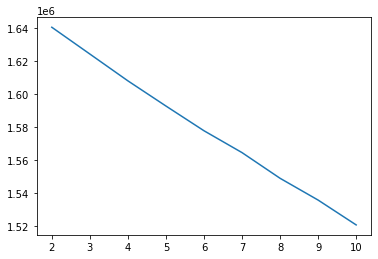

In [38]:
plt.plot(range(2, 11), sse)
plt.show()

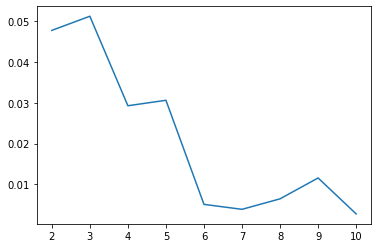

In [39]:
plt.plot(range(2, 11), silhouette)
plt.show()

In [40]:
# Since the model is mainly separating the 2 groups in males and females, we´ll use k=4 to get more meaninfull results
cluster = 4
classifier_kmeans = KMeans(n_clusters=cluster, random_state=42)
classifier_kmeans.fit(df_ml_humanos_2_std)
classifier_kmeans.predict(df_ml_humanos_2_std)
inertia = classifier_kmeans.inertia_
silhouette = silhouette_score(df_ml_humanos_2_std, classifier_kmeans.labels_)
print(f'K: {cluster}   Inertia: {inertia:.3f} Silhouette Score: {silhouette}')

K: 4   Inertia: 1607983.495 Silhouette Score: 0.029260846441803337


Resultados muy malos: Inertia alto y silhouette muy bajo, lo que significa que los puntos están distantes de los centroids y los grupos sin mucha definicion entre ellos.

In [41]:
# Print labels count
print(f'Label 0: {classifier_kmeans.labels_.tolist().count(0)}')
print(f'Label 1: {classifier_kmeans.labels_.tolist().count(1)}')
print(f'Label 2: {classifier_kmeans.labels_.tolist().count(2)}')
print(f'Label 3: {classifier_kmeans.labels_.tolist().count(3)}')

print(f'Sum of all labels: {len(classifier_kmeans.labels_.tolist())}')

Label 0: 253
Label 1: 4993
Label 2: 9786
Label 3: 797
Sum of all labels: 15829


In [42]:
# Add 'labels' column on original pre-processed df
df_fuente_ml_humanos_2['Labels'] = classifier_kmeans.labels_

In [43]:
# Group by Labels in order to withdraw first conclusions about it
df_fuente_ml_humanos_2.groupby('Labels').mean()

,punk_id,amount_ether,amount_$,type.1,'Bandana','Beanie','BigBeard','BigShades','BlackLipstick','BlondeBob',...,'WildHair','WildWhiteHair',traits_counts,year,month,day,skin_Albino,skin_Dark,skin_Light,skin_Mid
Labels,,,,,,,,,,,,,,,,,,,,,
0,5359.715415,21.596752,52165.457431,0.384000,0.000000,0.000000,0.000000,0.003953,0.205534,0.00000,...,0.000000,0.000000,7.849802,2020.387352,4.972332,14.011858,0.110672,0.383399,0.229249,0.276680
1,5451.910675,22.814562,54352.901943,0.384000,0.055277,0.000000,0.000000,0.037052,0.181855,0.02864,...,0.037853,0.030242,8.106149,2020.185460,5.463249,15.862808,0.097937,0.299619,0.287402,0.315041
2,5363.078990,20.548093,49992.277452,0.603326,0.059064,0.009197,0.021357,0.061721,0.000000,0.00000,...,0.048641,0.000000,8.227774,2020.204476,5.626609,15.947578,0.088596,0.315042,0.299305,0.297057
3,5370.370138,21.975151,54663.032133,0.604000,0.022585,0.001255,0.010038,0.048934,0.000000,0.00000,...,0.017566,0.000000,8.051443,2020.258469,5.703890,16.202008,0.112923,0.292346,0.322459,0.272271


# 2 - Con tratamiento de outliers

Aqui creo que nos estamos equivocando. las ventas de más de un 1 millon no creo que sean outlier. Hasta pueden ser un cluster aparte. 

Para quitar outliers haburia que estanarizar primero y lueg quitar valores que esten por encima del percentil  75, 80 o 90% según se decida.

2414 / 15829 * 100 = 15.25% de los datos --> Son demasiados para ser outliers

In [63]:
df_fuente_ml_humanos_2 = df_fuente_ml_humanos_2.drop(columns='Labels')

In [64]:
df_fuente_ml_humanos_2.describe(include='all')

,punk_id,amount_ether,amount_$,type.1,'Bandana','Beanie','BigBeard','BigShades','BlackLipstick','BlondeBob',...,'WildHair','WildWhiteHair',traits_counts,year,month,day,skin_Albino,skin_Dark,skin_Light,skin_Mid
count,15829.000000,15829.000000,1.582900e+04,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,...,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.00000,15829.000000,15829.000000,15829.000000
mean,5391.412850,21.351628,5.163768e+04,0.530671,0.055089,0.005749,0.013709,0.052372,0.060648,0.009034,...,0.042896,0.009539,8.174490,2020.204119,5.568513,15.902710,0.09312,0.310127,0.295597,0.301156
std,2677.641288,28.899602,8.206740e+04,0.103711,0.228161,0.075606,0.116284,0.222784,0.238691,0.094620,...,0.202629,0.097206,0.987349,1.254345,2.957762,8.895748,0.29061,0.462560,0.456325,0.458775
min,0.000000,0.000000,0.000000e+00,0.384000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2017.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,3147.000000,1.000000,2.120400e+02,0.384000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,8.000000,2020.000000,3.000000,8.000000,0.00000,0.000000,0.000000,0.000000
50%,5428.000000,15.300000,3.041060e+04,0.604000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,8.000000,2021.000000,5.000000,16.000000,0.00000,0.000000,0.000000,0.000000
75%,7700.000000,28.000000,6.490980e+04,0.604000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,2021.000000,8.000000,23.000000,0.00000,1.000000,1.000000,1.000000
max,9998.000000,667.000000,1.776130e+06,0.604000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,9.000000,2021.000000,12.000000,31.000000,1.00000,1.000000,1.000000,1.000000


In [65]:
# Remove outliers with amount_$ bigger than 100000
df_ml_humanos_2_nooutl = df_fuente_ml_humanos_2[df_fuente_ml_humanos_2['amount_$']<100000]
removed = df_fuente_ml_humanos_2['amount_$'].count() - df_ml_humanos_2_nooutl['amount_$'].count()
print(f'We have removed {removed} from the df')

We have removed 2414 from the df


In [66]:
df_ml_humanos_2_nooutl.describe()

,punk_id,amount_ether,amount_$,type.1,'Bandana','Beanie','BigBeard','BigShades','BlackLipstick','BlondeBob',...,'WildHair','WildWhiteHair',traits_counts,year,month,day,skin_Albino,skin_Dark,skin_Light,skin_Mid
count,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,...,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000
mean,5391.839284,12.445706,24864.725747,0.532072,0.058367,0.004398,0.012971,0.052926,0.060753,0.009467,...,0.043459,0.008722,8.204696,2020.060977,5.291763,16.274842,0.092508,0.313902,0.290943,0.302646
std,2650.145254,12.543716,28273.113601,0.103205,0.234446,0.066174,0.113152,0.223894,0.238885,0.096841,...,0.203895,0.092985,0.961535,1.312284,3.055693,8.788724,0.289753,0.464095,0.454214,0.459421
min,0.000000,0.000000,0.000000,0.384000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3168.000000,0.600000,131.100000,0.384000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,8.000000,2020.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000
50%,5396.000000,8.000000,10652.100000,0.604000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,8.000000,2021.000000,5.000000,16.000000,0.000000,0.000000,0.000000,0.000000
75%,7647.000000,22.220000,44856.150000,0.604000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,2021.000000,7.000000,24.000000,0.000000,1.000000,1.000000,1.000000
max,9998.000000,100.000000,99912.200000,0.604000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,9.000000,2021.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
# Standardize values
scaler = StandardScaler()
df_ml_humanos_2_std = scaler.fit_transform(df_ml_humanos_2_nooutl)

In [68]:
# Create sum of squared error list to hold this values (inertia_) in order to see what´s the best value for k (Elbow Method)
sse = []
for k in range(1, 11):
    classifier_kmeans = KMeans(n_clusters=k)
    classifier_kmeans.fit(df_ml_humanos_2_std)
    sse.append(classifier_kmeans.inertia_)

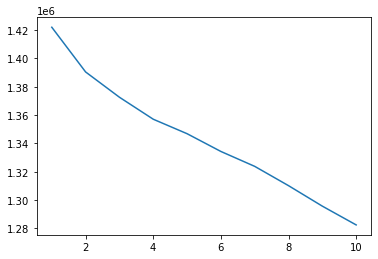

In [69]:
plt.plot(range(1, 11), sse)
plt.show()

In [70]:
classifier_kmeans = KMeans(n_clusters=4)
classifier_kmeans.fit(df_ml_humanos_2_std)

KMeans(n_clusters=4)

In [71]:
classifier_kmeans.predict(df_ml_humanos_2_std)

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

In [72]:
inertia = classifier_kmeans.inertia_
silhouette = silhouette_score(df_ml_humanos_2_std, classifier_kmeans.labels_)

print(f'Inertia: {inertia:.3f}')
print(f'Silhouette Score: {silhouette}')

Inertia: 1363337.060
Silhouette Score: 0.026638839795561305


Pequeña mejora del modelo anterior

# 3 - Con tratamiento de ouliers + PCA

In [73]:
df_fuente_ml_humanos_2

,punk_id,amount_ether,amount_$,type.1,'Bandana','Beanie','BigBeard','BigShades','BlackLipstick','BlondeBob',...,'WildHair','WildWhiteHair',traits_counts,year,month,day,skin_Albino,skin_Dark,skin_Light,skin_Mid
0,6401,19.990000,39866.70,0.384,0,0,0,0,1,0,...,0,0,9,2021,7,14,0,0,0,1
1,6401,16.980000,70784.50,0.384,0,0,0,0,1,0,...,0,0,9,2021,5,11,0,0,0,1
2,6401,20.750000,42996.30,0.384,0,0,0,0,1,0,...,0,0,9,2021,4,9,0,0,0,1
3,6401,18.500000,38334.00,0.384,0,0,0,0,1,0,...,0,0,9,2021,4,9,0,0,0,1
4,6401,17.990000,37573.40,0.384,0,0,0,0,1,0,...,0,0,9,2021,4,8,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15824,6397,0.550000,77.69,0.604,0,0,0,0,0,0,...,0,0,9,2020,1,8,0,1,0,0
15825,6398,18.500000,34686.60,0.604,0,0,0,0,0,0,...,0,0,9,2021,6,22,1,0,0,0
15826,6398,16.760000,39682.00,0.604,0,0,0,0,0,0,...,0,0,9,2021,6,16,1,0,0,0
15827,6398,0.666666,135.30,0.604,0,0,0,0,0,0,...,0,0,9,2020,5,14,1,0,0,0


In [74]:
pca_df = df_fuente_ml_humanos_2.select_dtypes(exclude='object')
pca = PCA(random_state=42)
pca.fit(pca_df)
print(pca.singular_values_)

[1.03248494e+07 3.36862785e+05 1.11964518e+03 9.23872981e+02
 3.57607589e+02 1.32571107e+02 1.18376278e+02 6.96023409e+01
 6.86780901e+01 5.41723161e+01 4.23006710e+01 3.71066537e+01
 3.48881384e+01 3.33802423e+01 3.11485764e+01 3.06274024e+01
 3.04149576e+01 3.01303100e+01 2.99713258e+01 2.95915673e+01
 2.91583664e+01 2.89684306e+01 2.86373190e+01 2.83371065e+01
 2.77184565e+01 2.71492802e+01 2.69922659e+01 2.66639810e+01
 2.64868425e+01 2.63282437e+01 2.62040846e+01 2.60330752e+01
 2.49493772e+01 2.46923187e+01 2.46780366e+01 2.43329400e+01
 2.41906532e+01 2.38924479e+01 2.35127630e+01 2.33855011e+01
 2.33403560e+01 2.32187276e+01 2.30208891e+01 2.28227940e+01
 2.26428195e+01 2.21800966e+01 2.19747753e+01 2.18082352e+01
 2.16351646e+01 2.14310873e+01 2.11532658e+01 2.09542066e+01
 2.04882768e+01 2.02597586e+01 2.00552596e+01 1.94224799e+01
 1.90561071e+01 1.87940088e+01 1.86138484e+01 1.84023736e+01
 1.81767858e+01 1.79679542e+01 1.77233294e+01 1.75869381e+01
 1.74697845e+01 1.716639

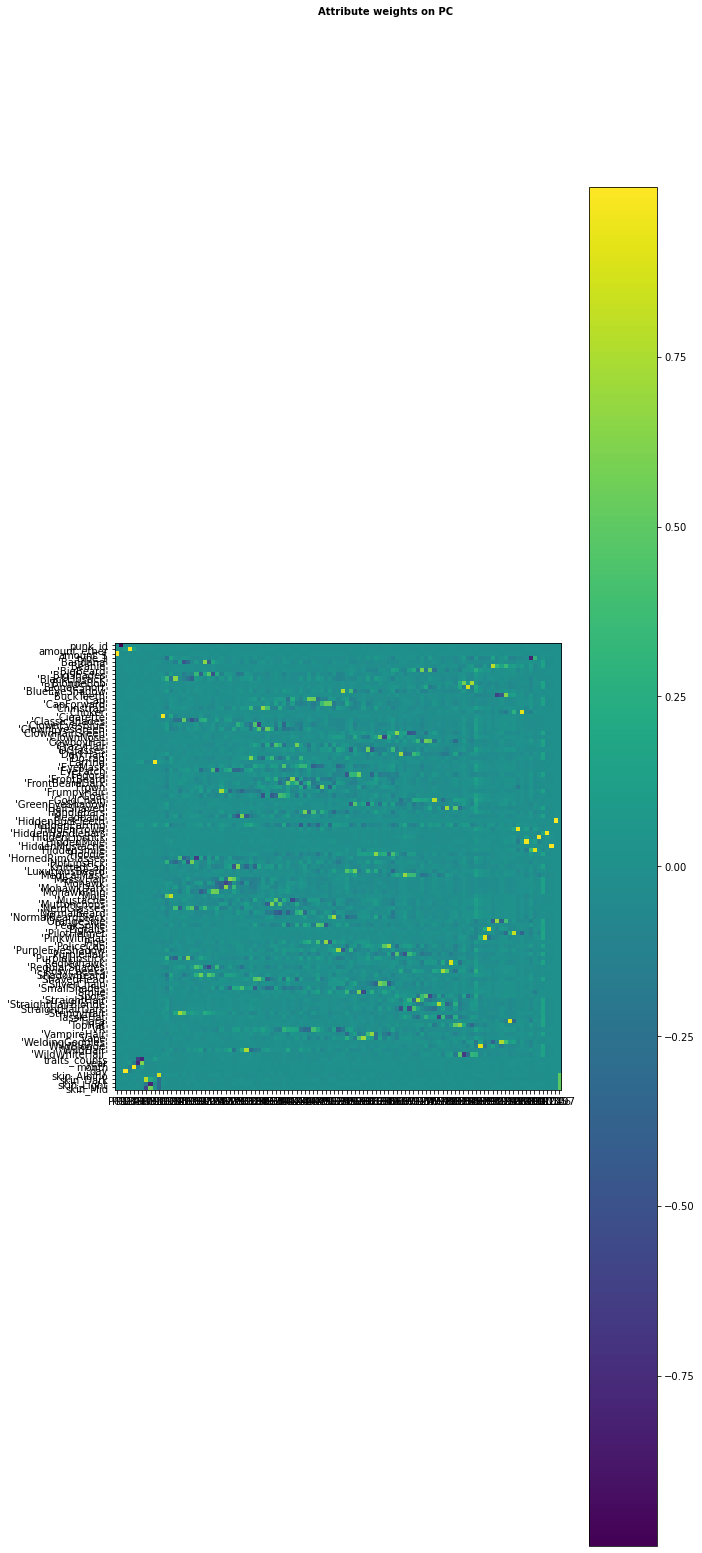

In [75]:
data = pca.components_
columns = pca_df.columns

index = []
x=0
for i in data:
    index.append(f"PC{1+x}")
    x+=1

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,25))
plt.imshow(data.transpose(), cmap='viridis') # Plotegem la matriu de correlació transposada ".T"
plt.yticks(range(len(columns)), columns)
plt.xticks(range(len(index)), index)
plt.grid(False)
fig.suptitle('Attribute weights on PC', fontsize = 10, fontweight = "bold")
plt.savefig('./CSV/PCA.png')
plt.colorbar()

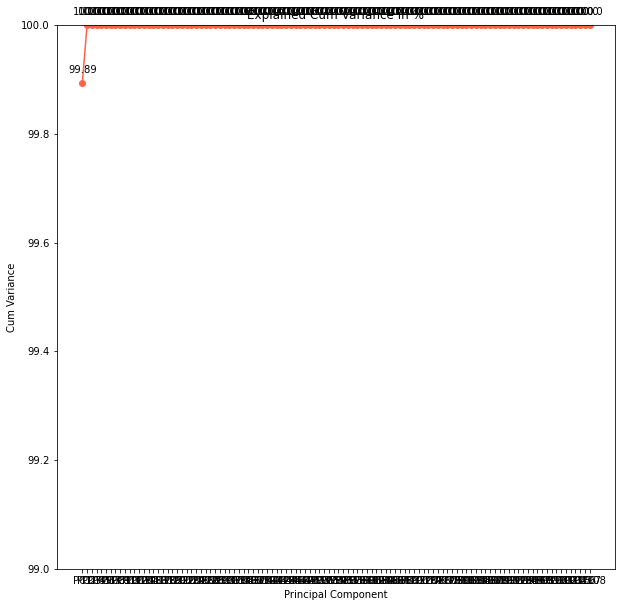

In [59]:
# Ploting the cumulate variance for each PC
# =================================================================
cum_var  = pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
ax.plot(index, cum_var*100, marker = 'o', color='tomato')

for z,h in zip(index, cum_var*100):
    label = round(h, 2)
    ax.annotate(
        label,
        (z,h),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(99, 100)
ax.set_xticks(np.arange(pca.n_components_))
ax.set_title('Explained Cum Variance in %',)
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cum Variance');

In [ ]:
# Apply PCA transformation
pca = PCA(n_components=1)
df_ml_humanos_3_pca = pca.fit_transform(df_ml_humanos_2_std)

In [ ]:
#print(pca.singular_values_)

#print(df_ml_humanos_3_pca.shape)

In [ ]:
# Create sum of squared error list to hold this values (inertia_) in order to see what´s the best value for k (Elbow Method)
sse = []
for k in range(1, 11):
    classifier_kmeans = KMeans(n_clusters=k)
    classifier_kmeans.fit(df_ml_humanos_3_pca)
    sse.append(classifier_kmeans.inertia_)

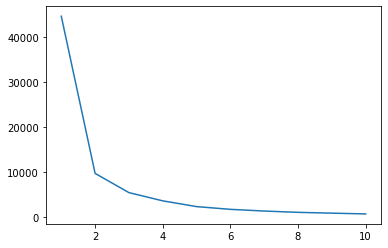

In [ ]:
plt.plot(range(1, 11), sse)
plt.show()

In [ ]:
classifier_kmeans = KMeans(n_clusters=4)
classifier_kmeans.fit(df_ml_humanos_3_pca)

KMeans(n_clusters=4)

In [ ]:
classifier_kmeans.predict(df_ml_humanos_3_pca)

array([1, 1, 1, ..., 3, 3, 0], dtype=int32)

In [ ]:
inertia = classifier_kmeans.inertia_
silhouette = silhouette_score(df_ml_humanos_3_pca, classifier_kmeans.labels_)

print(f'Inertia: {inertia:.3f}')
print(f'Silhouette Score: {silhouette}')

Inertia: 3639.451
Silhouette Score: 0.5356473724782825


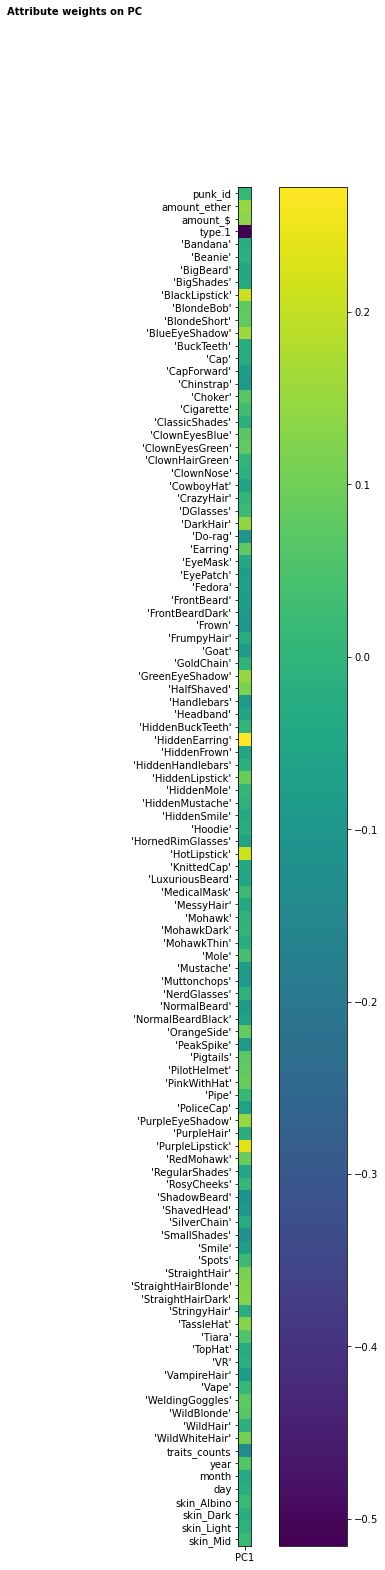

In [ ]:
data = pca.components_
columns = pca_df.columns

index = []
x=0
for i in data:
    index.append(f"PC{1+x}")
    x+=1

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,25))
plt.imshow(data.transpose(), cmap='viridis') # Plotegem la matriu de correlació transposada ".T"
plt.yticks(range(len(columns)), columns)
plt.xticks(range(len(index)), index)
plt.grid(False)
fig.suptitle('Attribute weights on PC', fontsize = 10, fontweight = "bold")
plt.savefig('./CSV/PCA.png')
plt.colorbar()

In [ ]:
pca.components_

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

Using PCA with 2 components we have a significant improvement on the results.

In [ ]:
# Print labels count
print(f'Label 0: {classifier_kmeans.labels_.tolist().count(0)}')
print(f'Label 1: {classifier_kmeans.labels_.tolist().count(1)}')
print(f'Label 2: {classifier_kmeans.labels_.tolist().count(2)}')
print(f'Label 3: {classifier_kmeans.labels_.tolist().count(3)}')

print(f'Sum of all labels: {len(classifier_kmeans.labels_.tolist())}')

Label 0: 477
Label 1: 6298
Label 2: 3912
Label 3: 2728
Sum of all labels: 13415


In [ ]:
# Add 'labels' column on original pre-processed df
df_ml_humanos_2_nooutl['Labels'] = classifier_kmeans.labels_

<ipython-input-325-4a2d50e41550>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml_humanos_2_nooutl['Labels'] = classifier_kmeans.labels_


In [ ]:
#print('Label 0 - Male')
#print('Label 1 - Female')

In [ ]:
# Group by Labels in order to withdraw first conclusions about it
df_ml_humanos_2_nooutl.groupby('Labels').mean()

,amount_$,rarity,'Bandana','Beanie','BigBeard','BigShades','BlackLipstick','BlondeBob','BlondeShort','BlueEyeShadow','BuckTeeth','Cap','CapForward','Chinstrap','Choker','Cigarette','ClassicShades','ClownEyesBlue','ClownEyesGreen','ClownHairGreen','ClownNose','CowboyHat','CrazyHair','DGlasses','DarkHair','Do-rag','Earring','EyeMask','EyePatch','Fedora','FrontBeard','FrontBeardDark','Frown','FrumpyHair','Goat','GoldChain','GreenEyeShadow','HalfShaved','Handlebars','Headband','HiddenBuckTeeth','HiddenEarring','HiddenFrown','HiddenHandlebars','HiddenLipstick','HiddenMole','HiddenMustache','HiddenSmile','Hoodie','HornedRimGlasses','HotLipstick','KnittedCap','LuxuriousBeard','MedicalMask','MessyHair','Mohawk','MohawkDark','MohawkThin','Mole','Mustache','Muttonchops','NerdGlasses','NormalBeard','NormalBeardBlack','OrangeSide','PeakSpike','Pigtails','PilotHelmet','PinkWithHat','Pipe','PoliceCap','PurpleEyeShadow','PurpleHair','PurpleLipstick','RedMohawk','RegularShades','RosyCheeks','ShadowBeard','ShavedHead','SilverChain','SmallShades','Smile','Spots','StraightHair','StraightHairBlonde','StraightHairDark','StringyHair','TassleHat','Tiara','TopHat','VR','VampireHair','Vape','WeldingGoggles','WildBlonde','WildHair','WildWhiteHair',traits_counts,year,month,day,type.1_Female,type.1_Male,skin_Albino,skin_Dark,skin_Light,skin_Mid
Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24110.743124,2806.069182,0.004193,0.000000,0.000000,0.037736,0.161426,0.031447,0.004193,0.104822,0.000000,0.012579,0.000000,0.000000,0.023061,0.109015,0.058700,0.067086,0.092243,0.000000,0.029350,0.000000,0.000000,0.029350,0.104822,0.000000,0.926625,0.020964,0.010482,0.000000,0.000000,0.000000,0.000000,0.044025,0.000000,0.012579,0.073375,0.046122,0.000000,0.010482,0.0,0.880503,0.00000,0.000000,0.048218,0.020964,0.000000,0.000000,0.006289,0.014675,0.184486,0.000000,0.000000,0.058700,0.002096,0.004193,0.002096,0.012579,0.085954,0.000000,0.000000,0.064990,0.000000,0.006289,0.031447,0.000000,0.000000,0.044025,0.035639,0.035639,0.000000,0.090147,0.000000,0.232704,0.012579,0.018868,0.010482,0.000000,0.000000,0.004193,0.000000,0.000000,0.010482,0.079665,0.088050,0.104822,0.002096,0.136268,0.023061,0.000000,0.058700,0.000000,0.025157,0.004193,0.002096,0.083857,0.069182,4.610063,2019.725367,5.094340,15.865828,0.993711,0.006289,0.098532,0.322851,0.220126,0.358491
1,27339.993471,6454.645443,0.065894,0.002223,0.009209,0.053509,0.000000,0.000000,0.000000,0.000000,0.000953,0.043030,0.037155,0.047158,0.000000,0.084630,0.058114,0.026834,0.026040,0.013020,0.018260,0.008415,0.035249,0.014290,0.000000,0.059860,0.152747,0.040807,0.063036,0.022864,0.045252,0.042712,0.017307,0.061289,0.056367,0.006034,0.000000,0.000000,0.044300,0.049063,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013338,0.064147,0.000000,0.052715,0.021912,0.001588,0.056050,0.053985,0.054144,0.067799,0.068434,0.056208,0.056685,0.059543,0.054779,0.026516,0.000000,0.044617,0.000000,0.000000,0.000000,0.027310,0.024770,0.000000,0.009368,0.000000,0.000000,0.062242,0.005716,0.086535,0.058908,0.016990,0.057479,0.015560,0.008574,0.000000,0.000000,0.000000,0.071610,0.000000,0.000000,0.003811,0.033344,0.013973,0.016196,0.000000,0.000000,0.049857,0.000000,2.520324,2020.280724,5.133376,16.226262,0.000000,1.000000,0.104160,0.308352,0.309622,0.277866
2,26472.977676,5108.205266,0.064417,0.000000,0.000000,0.034509,0.188650,0.028630,0.029908,0.074642,0.000000,0.024284,0.000000,0.000000,0.008436,0.100460,0.051636,0.072597,0.070041,0.019939,0.017382,0.000000,0.045757,0.011503,0.040389,0.000000,0.164877,0.019172,0.020194,0.000000,0.000000,0.000000,0.000000,0.035276,0.000000,0.010481,0.057771,0.032975,0.000000,0.028630,0.0,0.001534,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044990,0.172546,0.038855,0.000000,0.010481,0.041667,0.059049,0.060327,0.053937,0.094836,0.000000,0.000000,0.052914,0.000000,0.000000,0.006646,0.000000,0.017127,0

In [ ]:
px.scatter(data_frame=df_ml_humanos_2_nooutl, x='rarity', y='amount_$', color='Labels')

In [ ]:
df_ml_humanos_2_nooutl.head(1)

,amount_$,rarity,'Bandana','Beanie','BigBeard','BigShades','BlackLipstick','BlondeBob','BlondeShort','BlueEyeShadow','BuckTeeth','Cap','CapForward','Chinstrap','Choker','Cigarette','ClassicShades','ClownEyesBlue','ClownEyesGreen','ClownHairGreen','ClownNose','CowboyHat','CrazyHair','DGlasses','DarkHair','Do-rag','Earring','EyeMask','EyePatch','Fedora','FrontBeard','FrontBeardDark','Frown','FrumpyHair','Goat','GoldChain','GreenEyeShadow','HalfShaved','Handlebars','Headband','HiddenBuckTeeth','HiddenEarring','HiddenFrown','HiddenHandlebars','HiddenLipstick','HiddenMole','HiddenMustache','HiddenSmile','Hoodie','HornedRimGlasses','HotLipstick','KnittedCap','LuxuriousBeard','MedicalMask','MessyHair','Mohawk','MohawkDark','MohawkThin','Mole','Mustache','Muttonchops','NerdGlasses','NormalBeard','NormalBeardBlack','OrangeSide','PeakSpike','Pigtails','PilotHelmet','PinkWithHat','Pipe','PoliceCap','PurpleEyeShadow','PurpleHair','PurpleLipstick','RedMohawk','RegularShades','RosyCheeks','ShadowBeard','ShavedHead','SilverChain','SmallShades','Smile','Spots','StraightHair','StraightHairBlonde','StraightHairDark','StringyHair','TassleHat','Tiara','TopHat','VR','VampireHair','Vape','WeldingGoggles','WildBlonde','WildHair','WildWhiteHair',traits_counts,year,month,day,type.1_Female,type.1_Male,skin_Albino,skin_Dark,skin_Light,skin_Mid,Labels
0,39866.7,5693.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2021,7,14,1,0,0,0,0,1,2


In [ ]:
#df_fuente_ml[(df_fuente_ml['type.1'] == 'Female') | (df_fuente_ml['amount_$'] < 100000) | (df_fuente_ml['type'] == 'Sold')].describe()

In [ ]:
df_fuente_ml.head(1)

,Unnamed: 0_x,index,id,punk_id,type,from,to,amount_ether,amount_$,date,id.1,rarity,type.1,skin,traits,'Bandana','Beanie','BigBeard','BigShades','BlackLipstick','BlondeBob','BlondeShort','BlueEyeShadow','BuckTeeth','Cap','CapForward','Chinstrap','Choker','Cigarette','ClassicShades','ClownEyesBlue','ClownEyesGreen','ClownHairGreen','ClownNose','CowboyHat','CrazyHair','DGlasses','DarkHair','Do-rag','Earring','EyeMask','EyePatch','Fedora','FrontBeard','FrontBeardDark','Frown','FrumpyHair','Goat','GoldChain','GreenEyeShadow','HalfShaved','Handlebars','Headband','HiddenBuckTeeth','HiddenEarring','HiddenFrown','HiddenHandlebars','HiddenLipstick','HiddenMole','HiddenMustache','HiddenSmile','Hoodie','HornedRimGlasses','HotLipstick','KnittedCap','LuxuriousBeard','MedicalMask','MessyHair','Mohawk','MohawkDark','MohawkThin','Mole','Mustache','Muttonchops','NerdGlasses','NormalBeard','NormalBeardBlack','OrangeSide','PeakSpike','Pigtails','PilotHelmet','PinkWithHat','Pipe','PoliceCap','PurpleEyeShadow','PurpleHair','PurpleLipstick','RedMohawk','RegularShades','RosyCheeks','ShadowBeard','ShavedHead','SilverChain','SmallShades','Smile','Spots','StraightHair','StraightHairBlonde','StraightHairDark','StringyHair','TassleHat','Tiara','TopHat','VR','VampireHair','Vape','WeldingGoggles','WildBlonde','WildHair','WildWhiteHair',Unnamed: 0_y,traits_counts,trans_type,year,month,day
0,17,100010,0x953cae,6401,Sold,0x577eBC,0x561786,19.99,39866.7,2021-07-14,6401,5693.0,Female,Mid,"['BlackLipstick', 'BlueEyeShadow', 'MessyHair']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,3,Sold,2021,07,14


In [ ]:
# Check price outliers
px.box(data_frame=df_ml_dummies_humanos, y='amount_$')

In [ ]:
df_fuente_sold.head(1)

df_traits_dummies = pd.read_csv('transactions_punks_dummies.csv')

# SOPORTE

#df_fuente_sold["cantidad_traits"] = df_fuente_sold["traits"].apply(lambda x: len(x.split(",")))
#df_fuente_sold["day"] = df_fuente_sold["date"].apply(lambda x: x.split("-")[2])
df_fuente_sold_humanos = df_fuente_sold[(df_fuente_sold['type.1'] == 'Male') | (df_fuente_sold['type.1'] == 'Female')]

df_fuente_sold_humanos

df_ml_humanos = df_fuente_sold_humanos[["from", "to", "amount_$", "date", "rarity", "type.1", "skin", "Year", "cantidad_traits"]]

NameError: name 'df_fuente_sold' is not defined

In [ ]:
df_traits_dummies.head(1)

,Unnamed: 0,index,punk_id,trans_type,from,to,amount_ether,amount_$,date,rarity,type,skin,traits,traits_counts,'Bandana','Beanie,'Beanie','BigBeard,'BigBeard','BigShades,'BigShades','BlackLipstick,'BlackLipstick','BlondeBob,'BlondeBob','BlondeShort,'BlondeShort','BlueEyeShadow,'BlueEyeShadow','BuckTeeth,'BuckTeeth','Cap,'Cap','CapForward,'CapForward','Chinstrap,'Chinstrap','Choker,'Choker','Cigarette,'Cigarette','ClassicShades,'ClassicShades','ClownEyesBlue,'ClownEyesBlue','ClownEyesGreen,'ClownEyesGreen','ClownHairGreen,'ClownHairGreen','ClownNose,'ClownNose','CowboyHat,'CowboyHat','CrazyHair,'CrazyHair','DarkHair,'DarkHair','Do-rag,'Do-rag','Earring,'Earring','EyeMask,'EyeMask','EyePatch,'EyePatch','Fedora,'Fedora','FrontBeard,'FrontBeard','FrontBeardDark,'FrontBeardDark','Frown,'Frown','FrumpyHair,'FrumpyHair','Goat,'Goat','GoldChain,'GoldChain','GreenEyeShadow,'GreenEyeShadow','HalfShaved,'HalfShaved','Handlebars,'Handlebars','Headband,'Headband','HiddenBuckTeeth,'HiddenEarring,'HiddenEarring','HiddenFrown,'HiddenHandlebars,'HiddenLipstick,'HiddenMole,'HiddenMole','HiddenMustache,'HiddenSmile,'Hoodie,'Hoodie','HornedRimGlasses,'HornedRimGlasses','HotLipstick,'HotLipstick','KnittedCap,'KnittedCap','LuxuriousBeard,'LuxuriousBeard','MedicalMask,'MedicalMask','MessyHair,'MessyHair','Mohawk,'Mohawk','MohawkDark,'MohawkDark','MohawkThin,'MohawkThin','Mole,'Mole','Mustache,'Mustache','Muttonchops,'Muttonchops','NerdGlasses,'NerdGlasses','NormalBeard,'NormalBeard','NormalBeardBlack,'NormalBeardBlack','OrangeSide,'OrangeSide','PeakSpike,'PeakSpike','Pigtails,'Pigtails','PilotHelmet,'PilotHelmet','PinkWithHat,'PinkWithHat','Pipe,'Pipe','PoliceCap,'PoliceCap','PurpleEyeShadow,'PurpleEyeShadow','PurpleHair,'PurpleHair','PurpleLipstick,'PurpleLipstick','RedMohawk,'RedMohawk','RegularShades,'RegularShades','RosyCheeks,'RosyCheeks','ShadowBeard,'ShadowBeard','ShavedHead,'ShavedHead','SilverChain,'SilverChain','SmallShades,'SmallShades','Smile,'Smile','Spots,'Spots','StraightHair,'StraightHair','StraightHairBlonde,'StraightHairBlonde','StraightHairDark,'StraightHairDark','StringyHair,'StringyHair','TassleHat,'TassleHat','Tiara,'Tiara','TopHat,'TopHat','VR,'VR','VampireHair,'VampireHair','Vape,'Vape','WeldingGoggles,'WeldingGoggles','WildBlonde,'WildBlonde','WildHair,'WildHair','WildWhiteHair,'WildWhiteHair',Bandana,Bandana',Beanie,Beanie',BigBeard,BigBeard',BigShades,BigShades',BlackLipstick,BlackLipstick',BlondeBob,BlondeBob',BlondeShort,BlondeShort',BlueEyeShadow,BlueEyeShadow',BuckTeeth',Cap,Cap',CapForward,CapForward',Chinstrap,Chinstrap',Choker,Choker',Cigarette,Cigarette',ClassicShades,ClassicShades',ClownEyesBlue,ClownEyesBlue',ClownEyesGreen,ClownEyesGreen',ClownHairGreen,ClownHairGreen',ClownNose,ClownNose',CowboyHat,CowboyHat',CrazyHair,CrazyHair',DGlasses,DGlasses',DarkHair,DarkHair',Do-rag,Do-rag',Earring,Earring',EyeMask',EyePatch,EyePatch',Fedora,Fedora',FrontBeard,FrontBeard',FrontBeardDark,FrontBeardDark',Frown,Frown',FrumpyHair,FrumpyHair',Goat,Goat',GoldChain',GreenEyeShadow,GreenEyeShadow',HalfShaved,HalfShaved',Handlebars,Handlebars',Headband,Headband',Hoodie,Hoodie',HornedRimGlasses,HornedRimGlasses',HotLipstick,HotLipstick',KnittedCap,KnittedCap',LuxuriousBeard,LuxuriousBeard',MedicalMask,MedicalMask',MessyHair,MessyHair',Mohawk,Mohawk',MohawkDark,MohawkDark',MohawkThin,MohawkThin',Mole,Mole',Mustache,Mustache',Muttonchops,Muttonchops',NerdGlasses,NerdGlasses',NormalBeard,NormalBeard',NormalBeardBlack,NormalBeardBlack',OrangeSide,OrangeSide',PeakSpike,PeakSpike',Pigtails,Pigtails',PilotHelmet,PilotHelmet',PinkWithHat,PinkWithHat',Pipe,Pipe',PoliceCap,PoliceCap',PurpleEyeShadow,PurpleEyeShadow',PurpleHair,PurpleHair',PurpleLipstick,PurpleLipstick',RedMohawk,RedMohawk',RegularShades,RegularShades',RosyCheeks,RosyCheeks',ShadowBeard,ShadowBeard',ShavedHead,ShavedHead',SilverChain,SilverChain',SmallShades,SmallShades',Smile,Smile',Spots,Spots',StraightHair,StraightHairBlonde,StraightHairBlonde',StraightHairDark,StraightHa

In [ ]:


df_ml_dummies_humanos = pd.get_dummies(data=df_ml_humanos, columns=["type.1", "skin"])

In [ ]:
# SOPORTE

#df_ml_dummies_humanos.drop(columns=["date"], axis=1, inplace=True)
#df_ml_dummies_humanos = df_ml_dummies_humanos.astype({'Year':int})

In [ ]:
df_ml_dummies_humanos.head(1)

df_ml_dummies_humanos.describe()

,from,to,amount_$,rarity,Year,cantidad_traits,type.1_Female,type.1_Male,skin_Albino,skin_Dark,skin_Light,skin_Mid
104242,0x5b098b,0xc352b5,3.42,3440.0,2017,3,0,1,0,0,0,1


In [ ]:
df_ml_dummies_humanos.drop(columns=['from', 'to'], axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15829 entries, 104242 to 72635
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   amount_$         15829 non-null  float64
 1   rarity           15829 non-null  float64
 2   Year             15829 non-null  int32  
 3   cantidad_traits  15829 non-null  int64  
 4   type.1_Female    15829 non-null  uint8  
 5   type.1_Male      15829 non-null  uint8  
 6   skin_Albino      15829 non-null  uint8  
 7   skin_Dark        15829 non-null  uint8  
 8   skin_Light       15829 non-null  uint8  
 9   skin_Mid         15829 non-null  uint8  
dtypes: float64(2), int32(1), int64(1), uint8(6)
memory usage: 649.2 KB


In [ ]:
df_ml_dummies_humanos_nooutl.describe()

,amount_$,rarity,Year,cantidad_traits,type.1_Female,type.1_Male,skin_Albino,skin_Dark,skin_Light,skin_Mid
count,14027.000000,14027.000000,14027.000000,14027.000000,14027.000000,14027.000000,14027.0,14027.000000,14027.000000,14027.000000
mean,44143.221487,5331.482641,2020.190704,2.841591,0.331432,0.668568,0.0,0.342554,0.324873,0.332573
std,58666.993410,2784.259130,1.253794,0.809981,0.470745,0.470745,0.0,0.474581,0.468344,0.471152
min,0.000000,5.000000,2017.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,200.040000,2951.500000,2020.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,28235.500000,5461.000000,2021.000000,3.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000
75%,60877.600000,7646.000000,2021.000000,3.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000
max,296870.000000,9998.000000,2021.000000,5.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [ ]:
px.box(data_frame=df_ml_dummies_humanos_nooutl, y='amount_$')

In [ ]:
df_ml_dummies_humanos_pca.shape

(14027, 2)

# Plot

In [ ]:
df_pca_plot = pd.DataFrame(df_ml_dummies_humanos_pca)

In [ ]:
df_pca_plot = pd.concat([df_pca_plot, pd.DataFrame(classifier_kmeans.labels_, columns=['Label'])], axis=1)
df_pca_plot

,0,1,Label
0,-0.794590,-2.774026,1
1,-1.332744,-2.746350,1
2,2.346876,-2.734889,0
3,-1.228621,-0.569805,1
4,2.303765,-2.766696,0
...,...,...,...
14022,2.521828,2.543660,0
14023,2.163495,2.376417,0
14024,-1.037431,2.388700,1
14025,1.893196,2.580997,0


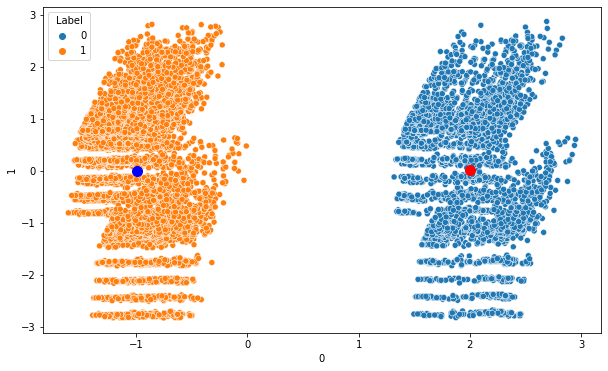

In [ ]:
# Plot points and centroids using matplotlib and seaborn
plt.figure(figsize = (10, 6))
sns.scatterplot(data=df_pca_plot, x=df_pca_plot[0], y=df_pca_plot[1], hue='Label')
plt.scatter(classifier_kmeans.cluster_centers_[0][0], classifier_kmeans.cluster_centers_[0][1], c='red', s=100)
plt.scatter(classifier_kmeans.cluster_centers_[1][0], classifier_kmeans.cluster_centers_[1][1], c='blue', s=100)
plt.show()

In [ ]:
classifier_kmeans.cluster_centers_

NameError: name 'classifier_kmeans' is not defined